# **Project: Retail Sales Trend Analysis & Forecasting using German Federal Bank Data**

# Notebook 03 – KPI Definition & Exploratory Analysis

**Objective:** Load the analysis-ready dataset, calculate KPIs, perform exploratory analysis, and visualize trends for business reporting and forecasting.





# **1️⃣ Imports & Config**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("Notebook03_KPI_EDA")


# **2️⃣ Load Analysis-Ready Dataset**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/retaildataanalysis/dataset/outputs/retail_analysis_ready.csv")
df['date'] = pd.to_datetime(df['date'])
logger.info(f"Analysis-ready dataset loaded: {df.shape[0]} rows")


# **3️⃣ KPI Table Generation**

In [6]:
# Annual KPIs
kpi_summary = df.groupby('year').agg(
    avg_retail_index=('retail_index','mean'),
    yoy_growth_avg=('yoy_growth_pct','mean'),
    mom_growth_avg=('mom_growth_pct','mean')
).reset_index()

logger.info("Annual KPIs calculated")
print(kpi_summary)


    year  avg_retail_index  yoy_growth_avg  mom_growth_avg
0   1994         83.825000             NaN        3.467386
1   1995         85.225000        1.741524        0.683562
2   1996         85.166667       -0.026274        0.493023
3   1997         84.366667       -0.895406        0.409362
4   1998         84.933333        0.630378        0.746685
5   1999         85.225000        0.340277        0.757718
6   2000         87.216667        2.371459        0.720199
7   2001         88.425000        1.455987        0.464311
8   2002         86.558333       -2.105882        0.406393
9   2003         85.708333       -0.957542        0.387526
10  2004         87.125000        1.627884        0.732755
11  2005         88.883333        2.070101        0.539929
12  2006         89.975000        1.179502        0.869816
13  2007         88.550000       -1.505304        0.123729
14  2008         90.216667        1.949127        0.418300
15  2009         87.183333       -3.401306        0.3762

# **4️⃣ Exploratory Data Analysis Pipeline**

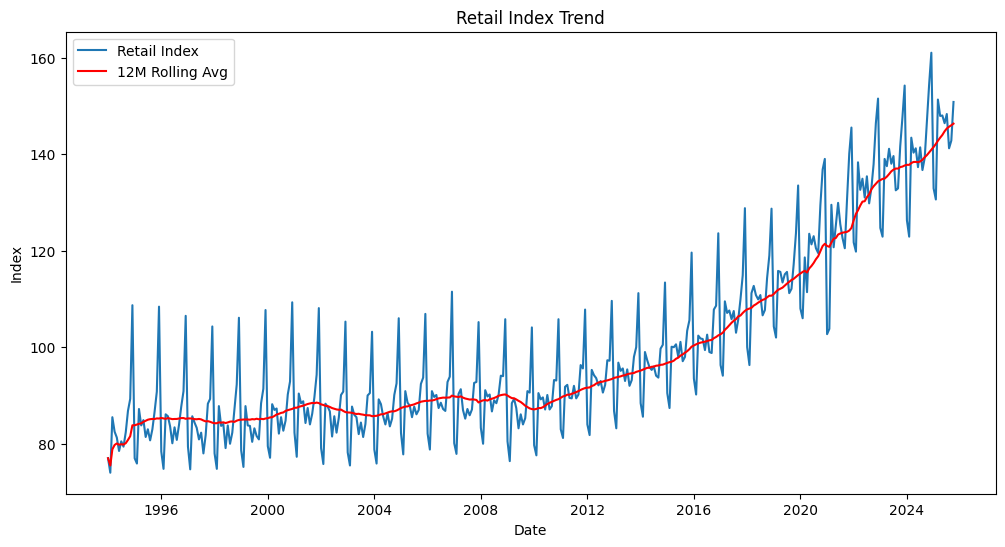

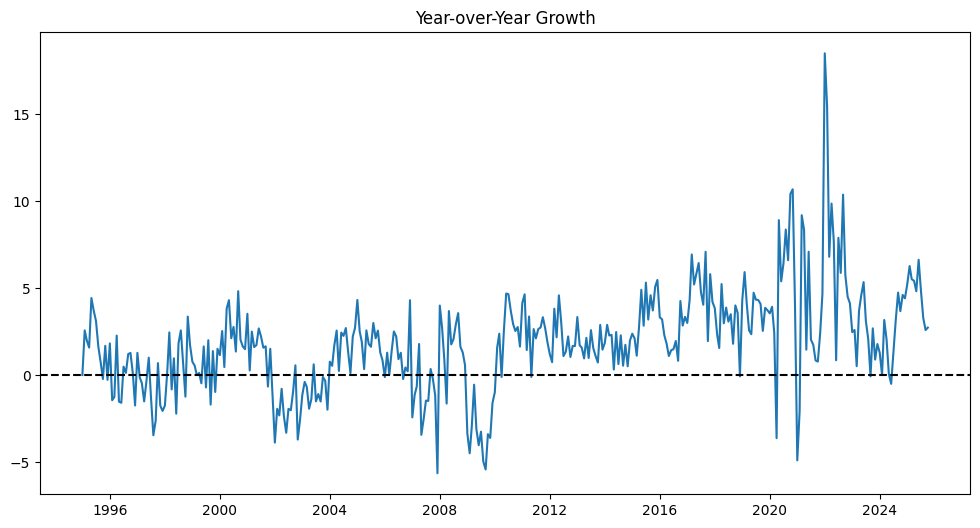

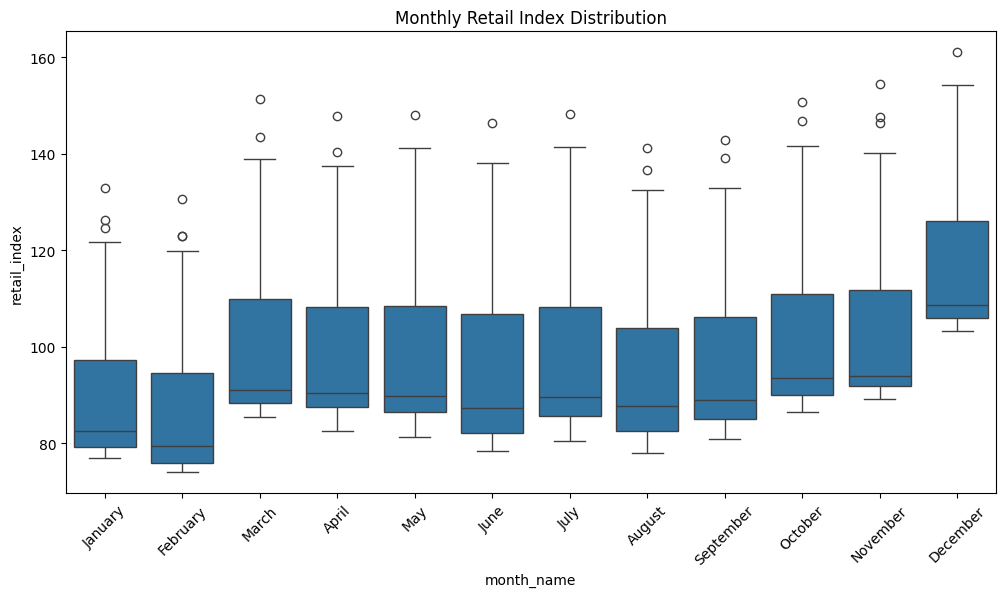

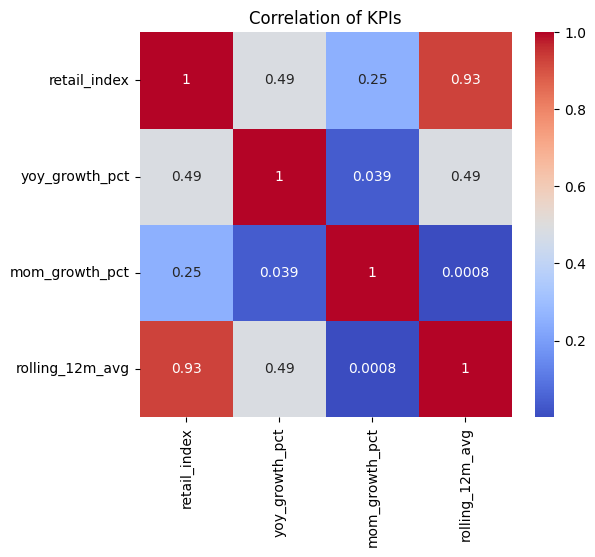

In [8]:
def eda_pipeline(df):
    # Trend
    plt.figure(figsize=(12,6))
    plt.plot(df['date'], df['retail_index'], label='Retail Index')
    plt.plot(df['date'], df['rolling_12m_avg'], label='12M Rolling Avg', color='red')
    plt.title('Retail Index Trend')
    plt.xlabel('Date')
    plt.ylabel('Index')
    plt.legend()
    plt.savefig(
    "/content/drive/MyDrive/retaildataanalysis/figures/retail_index_trend.png",
    dpi=300,
    bbox_inches='tight'
    )
    plt.show()


    # YoY Growth
    plt.figure(figsize=(12,6))
    plt.plot(df['date'], df['yoy_growth_pct'], label='YoY Growth %')
    plt.axhline(0, color='black', linestyle='--')
    plt.title('Year-over-Year Growth')
    plt.show()

    # Seasonality
    plt.figure(figsize=(12,6))
    sns.boxplot(x='month_name', y='retail_index', data=df, order=df['month_name'].unique())
    plt.title('Monthly Retail Index Distribution')
    plt.xticks(rotation=45)
    plt.show()

    # KPI Correlation
    plt.figure(figsize=(6,5))
    corr = df[['retail_index','yoy_growth_pct','mom_growth_pct','rolling_12m_avg']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation of KPIs')
    plt.show()

eda_pipeline(df)


# **5️⃣ Unit Tests for Notebook 03**

In [ ]:
def test_kpis(df):
    assert 'yoy_growth_pct' in df.columns, "yoy_growth_pct missing"
    assert 'mom_growth_pct' in df.columns, "mom_growth_pct missing"
    assert 'rolling_12m_avg' in df.columns, "rolling_12m_avg missing"

test_kpis(df)
logger.info("All KPI unit tests passed ✅")


# **6️⃣ Save KPI-Ready Dataset**

In [ ]:
df.to_csv("/content/drive/MyDrive/retaildataanalysis/dataset/outputs/retail_kpi.csv", index=False)
logger.info("KPI dataset saved for visualization and forecasting")
